In [1]:
import pandas as pd
import numpy as np

In [2]:
bank_df = pd.read_csv("bank_data.csv")

In [3]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Customer_ID                  5000 non-null   int64 
 1   Status_Checking_Acc          5000 non-null   object
 2   Duration_in_Months           5000 non-null   int64 
 3   Credit_History               5000 non-null   object
 4   Purposre_Credit_Taken        5000 non-null   object
 5   Credit_Amount                5000 non-null   int64 
 6   Savings_Acc                  5000 non-null   object
 7   Years_At_Present_Employment  5000 non-null   object
 8   Inst_Rt_Income               5000 non-null   int64 
 9   Marital_Status_Gender        5000 non-null   object
 10  Other_Debtors_Guarantors     5000 non-null   object
 11  Current_Address_Yrs          5000 non-null   int64 
 12  Property                     5000 non-null   object
 13  Age                          5000

In [4]:
bank_df.iloc[0:5,1:7]

,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc
0,A11,6,A34,A43,1169,A65
1,A12,48,A32,A43,5951,A61
2,A14,12,A34,A46,2096,A61
3,A11,42,A32,A42,7882,A61
4,A11,24,A33,A40,4870,A61


In [5]:
bank_df.iloc[0:5,7:]

,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,Current_Address_Yrs,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment
0,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,0
2,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,0
4,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,1


In [6]:
bank_df.Default_On_Payment.value_counts()

0    3505
1    1495
Name: Default_On_Payment, dtype: int64

In [7]:
x_features = list(bank_df.columns)

In [8]:
x_features.remove("Default_On_Payment")

In [9]:
x_features.remove("Customer_ID")

In [10]:
x_features

['Status_Checking_Acc',
 'Duration_in_Months',
 'Credit_History',
 'Purposre_Credit_Taken',
 'Credit_Amount',
 'Savings_Acc',
 'Years_At_Present_Employment',
 'Inst_Rt_Income',
 'Marital_Status_Gender',
 'Other_Debtors_Guarantors',
 'Current_Address_Yrs',
 'Property',
 'Age',
 'Other_Inst_Plans ',
 'Housing',
 'Num_CC',
 'Job',
 'Dependents',
 'Telephone',
 'Foreign_Worker']

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='Status_Checking_Acc', ylabel='Default_On_Payment'>

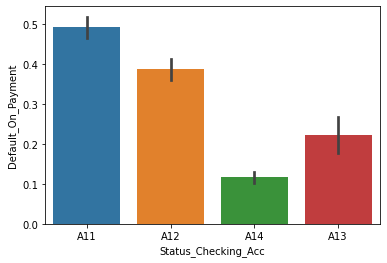

In [12]:
sns.barplot(x='Status_Checking_Acc',y='Default_On_Payment',data=bank_df)

(array([ 745., 1310.,  885.,  775.,  445.,  360.,  210.,  130.,  105.,
          35.]),
 array([19. , 24.6, 30.2, 35.8, 41.4, 47. , 52.6, 58.2, 63.8, 69.4, 75. ]),
 <BarContainer object of 10 artists>)

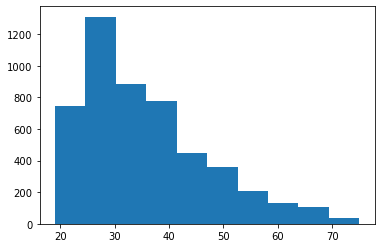

In [14]:
plt.hist(bank_df['Age'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


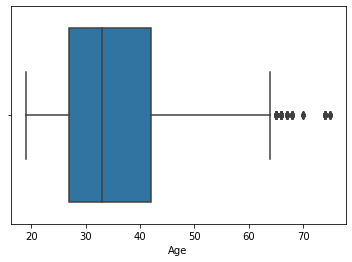

In [15]:
box = sns.boxplot(bank_df['Age'])

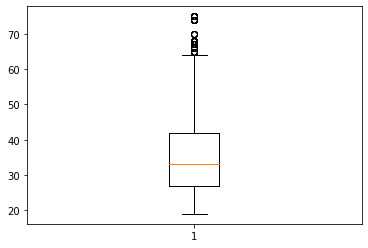

In [16]:
box = plt.boxplot(bank_df['Age'])

In [17]:
influential_features = ['Duration_in_Months','Credit_Amount','Num_CC','Age']

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


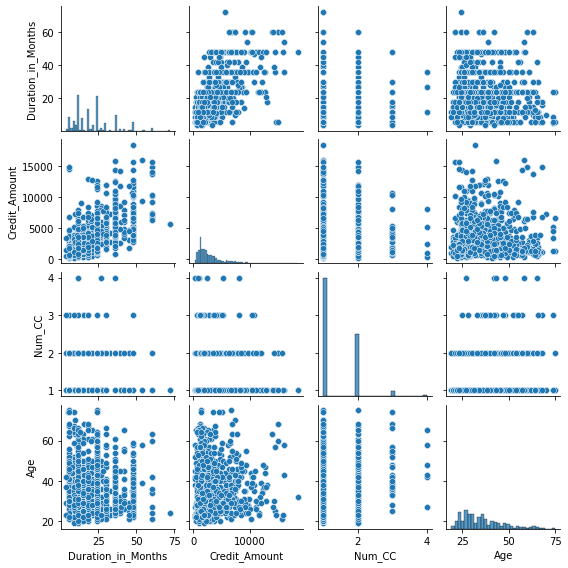

In [18]:
sns.pairplot(bank_df[influential_features],size=2)

In [19]:
bank_df[influential_features].corr()

,Duration_in_Months,Credit_Amount,Num_CC,Age
Duration_in_Months,1.000000,0.624984,-0.011284,-0.036136
Credit_Amount,0.624984,1.000000,0.020795,0.032716
Num_CC,-0.011284,0.020795,1.000000,0.149254
Age,-0.036136,0.032716,0.149254,1.000000


<AxesSubplot:>

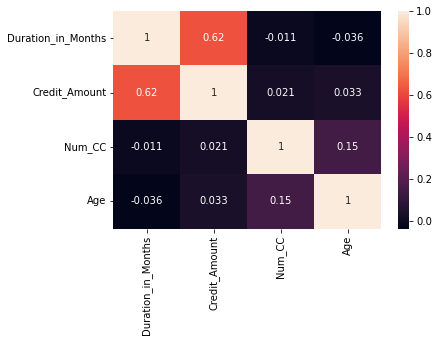

In [20]:
sns.heatmap(bank_df[influential_features].corr(),annot=True)

In [22]:
encoded_bank_df = pd.get_dummies(bank_df[x_features],
                               drop_first=True)

In [23]:
X_features = encoded_bank_df.columns

In [24]:
X_features

Index(['Duration_in_Months', 'Credit_Amount', 'Inst_Rt_Income',
       'Current_Address_Yrs', 'Age', 'Num_CC', 'Dependents',
       'Status_Checking_Acc_A12', 'Status_Checking_Acc_A13',
       'Status_Checking_Acc_A14', 'Credit_History_A31', 'Credit_History_A32',
       'Credit_History_A33', 'Credit_History_A34', 'Purposre_Credit_Taken_A41',
       'Purposre_Credit_Taken_A410', 'Purposre_Credit_Taken_A42',
       'Purposre_Credit_Taken_A43', 'Purposre_Credit_Taken_A44',
       'Purposre_Credit_Taken_A45', 'Purposre_Credit_Taken_A46',
       'Purposre_Credit_Taken_A48', 'Purposre_Credit_Taken_A49',
       'Savings_Acc_A62', 'Savings_Acc_A63', 'Savings_Acc_A64',
       'Savings_Acc_A65', 'Years_At_Present_Employment_A72',
       'Years_At_Present_Employment_A73', 'Years_At_Present_Employment_A74',
       'Years_At_Present_Employment_A75', 'Marital_Status_Gender_A92',
       'Marital_Status_Gender_A93', 'Marital_Status_Gender_A94',
       'Other_Debtors_Guarantors_A102', 'Other_Debtors_Gu

In [25]:
import statsmodels.api as sm

In [27]:
y = bank_df.Default_On_Payment
x = sm.add_constant(encoded_bank_df)

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,
                                                 y,
                                                 test_size=0.2,
                                                 random_state=42)

In [29]:
logit = sm.Logit(y_train,x_train)
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.445323
         Iterations 7


In [31]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
================================================================================
Model:                  Logit                  Pseudo R-squared:     0.267      
Dependent Variable:     Default_On_Payment     AIC:                  3660.5800  
Date:                   2022-11-06 12:02       BIC:                  3968.9885  
No. Observations:       4000                   Log-Likelihood:       -1781.3    
Df Model:               48                     LL-Null:              -2429.7    
Df Residuals:           3951                   LLR p-value:          4.5171e-240
Converged:              1.0000                 Scale:                1.0000     
No. Iterations:         7.0000                                                  
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------
const                            0.6198   0.5468   1.1335 0.2570 -0.4519  1.6915
Duration_in_Months               0.0307   0.0047   6.5514 0.0000  0.0215  0.0399
Credit_Amount                    0.0001   0.0000   5.3106 0.0000  0.0001  0.0002
Inst_Rt_Income                   0.3274   0.0446   7.3324 0.0000  0.2399  0.4149
Current_Address_Yrs             -0.0173   0.0434  -0.3986 0.6902 -0.1025  0.0678
Age                             -0.0164   0.0047  -3.5128 0.0004 -0.0256 -0.0073
Num_CC                           0.2244   0.0961   2.3343 0.0196  0.0360  0.4128
Dependents                       0.3182   0.1252   2.5414 0.0110  0.0728  0.5636
Status_Checking_Acc_A12         -0.4128   0.1093  -3.7761 0.0002 -0.6270 -0.1985
Status_Checking_Acc_A13         -0.9061   0.1831  -4.9483 0.0000 -1.2651 -0.5472
Status_Checking_Acc_A14         -1.7758   0.1177 -15.0893 0.0000 -2.0065 -1.5452
Credit_History_A31              -0.0541   0.2763  -0.1957 0.8448 -0.5957  0.4875
Credit_History_A32              -0.7640   0.2167  -3.5249 0.0004 -1.1888 -0.3392
Credit_History_A33              -0.9838   0.2365  -4.1604 0.0000 -1.4472 -0.5203
Credit_History_A34              -1.4669   0.2213  -6.6300 0.0000 -1.9006 -1.0333
Purposre_Credit_Taken_A41       -1.6745   0.1922  -8.7146 0.0000 -2.0511 -1.2979
Purposre_Credit_Taken_A410      -1.6115   0.3808  -4.2313 0.0000 -2.3579 -0.8650
Purposre_Credit_Taken_A42       -0.7768   0.1310  -5.9314 0.0000 -1.0334 -0.5201
Purposre_Credit_Taken_A43       -0.8798   0.1235  -7.1251 0.0000 -1.1218 -0.6378
Purposre_Credit_Taken_A44       -0.4938   0.3640  -1.3567 0.1749 -1.2072  0.2196
Purposre_Credit_Taken_A45       -0.0915   0.2799  -0.3270 0.7436 -0.6402  0.4571
Purposre_Credit_Taken_A46        0.2428   0.2063   1.1769 0.2393 -0.1616  0.6472
Purposre_Credit_Taken_A48       -2.3519   0.6810  -3.4536 0.0006 -3.6866 -1.0172
Purposre_Credit_Taken_A49       -0.7762   0.1657  -4.6853 0.0000 -1.1009 -0.4515
Savings_Acc_A62                 -0.3222   0.1420  -2.2692 0.0233 -0.6006 -0.0439
Savings_Acc_A63                 -0.1998   0.1985  -1.0068 0.3140 -0.5889  0.1892
Savings_Acc_A64                 -1.3338   0.2634  -5.0646 0.0000 -1.8500 -0.8176
Savings_Acc_A65                 -0.9022   0.1332  -6.7752 0.0000 -1.1632 -0.6412
Years_At_Present_Employment_A72 -0.1618   0.2146  -0.7540 0.4508 -0.5823  0.2588
Years_At_Present_Employment_A73 -0.2521   0.2058  -1.2253 0.2205 -0.6554  0.1512
Years_At_Present_Employment_A74 -0.8385   0.2231  -3.7580 0.0002 -1.2758 -0.4012
Years_At_Present_Employment_A75 -0.3548   0.2083  -1.7033 0.0885 -0.7631  0.0535
Marital_Status_Gender_A92       -0.3057   0.1914  -1.5975 0.1102 -0.6808  0.0694
Marital_Status_Gender_A93       -0.7948   0.1880  -4.2286 0.0000 -1.1632 -0.4264
Marital_Status_Gender_A94       -0.2913   0.2241  -1.3004 0.1935 -0.7305  0.1478
Other_Debtors_Guarantors_A102    0.5300   0.2060   2.5731 0.0101  0.1263  0.9336
Other_Debtors_G

In [33]:
def get_significant_vars( lm ):
    var_p_vals_df = pd.DataFrame(lm.pvalues)
    var_p_vals_df['vars']=var_p_vals_df.index
    var_p_vals_df.columns = ['pvals','vars']
    
    return list(var_p_vals_df[var_p_vals_df.pvals<=0.05]['vars'])

significant_vars = get_significant_vars(logit_model)
significant_vars

['Duration_in_Months',
 'Credit_Amount',
 'Inst_Rt_Income',
 'Age',
 'Num_CC',
 'Dependents',
 'Status_Checking_Acc_A12',
 'Status_Checking_Acc_A13',
 'Status_Checking_Acc_A14',
 'Credit_History_A32',
 'Credit_History_A33',
 'Credit_History_A34',
 'Purposre_Credit_Taken_A41',
 'Purposre_Credit_Taken_A410',
 'Purposre_Credit_Taken_A42',
 'Purposre_Credit_Taken_A43',
 'Purposre_Credit_Taken_A48',
 'Purposre_Credit_Taken_A49',
 'Savings_Acc_A62',
 'Savings_Acc_A64',
 'Savings_Acc_A65',
 'Years_At_Present_Employment_A74',
 'Marital_Status_Gender_A93',
 'Other_Debtors_Guarantors_A102',
 'Other_Debtors_Guarantors_A103',
 'Property_A124',
 'Other_Inst_Plans _A143',
 'Housing_A152',
 'Housing_A153',
 'Job_A172',
 'Job_A173',
 'Telephone_A192',
 'Foreign_Worker_A202']

In [36]:
final_logit = sm.Logit(y_train,
                       sm.add_constant(x_train[significant_vars])).fit()

Optimization terminated successfully.
         Current function value: 0.447644
         Iterations 7


In [37]:
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
================================================================================
Model:                  Logit                  Pseudo R-squared:     0.263      
Dependent Variable:     Default_On_Payment     AIC:                  3649.1517  
Date:                   2022-11-06 12:09       BIC:                  3863.1494  
No. Observations:       4000                   Log-Likelihood:       -1790.6    
Df Model:               33                     LL-Null:              -2429.7    
Df Residuals:           3966                   LLR p-value:          1.5623e-247
Converged:              1.0000                 Scale:                1.0000     
No. Iterations:         7.0000                                                  
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------
const                            0.6663   0.3582   1.8601 0.0629 -0.0358  1.3684
Duration_in_Months               0.0309   0.0046   6.6703 0.0000  0.0218  0.0400
Credit_Amount                    0.0001   0.0000   5.8692 0.0000  0.0001  0.0002
Inst_Rt_Income                   0.3332   0.0438   7.6035 0.0000  0.2473  0.4191
Age                             -0.0175   0.0043  -4.0606 0.0000 -0.0260 -0.0091
Num_CC                           0.2070   0.0917   2.2580 0.0239  0.0273  0.3868
Dependents                       0.3301   0.1239   2.6647 0.0077  0.0873  0.5728
Status_Checking_Acc_A12         -0.4189   0.1068  -3.9214 0.0001 -0.6283 -0.2095
Status_Checking_Acc_A13         -0.8932   0.1785  -5.0035 0.0000 -1.2431 -0.5433
Status_Checking_Acc_A14         -1.8038   0.1142 -15.7948 0.0000 -2.0276 -1.5799
Credit_History_A32              -0.7189   0.1507  -4.7694 0.0000 -1.0144 -0.4235
Credit_History_A33              -0.9009   0.1889  -4.7704 0.0000 -1.2710 -0.5308
Credit_History_A34              -1.4217   0.1700  -8.3613 0.0000 -1.7550 -1.0885
Purposre_Credit_Taken_A41       -1.6914   0.1864  -9.0743 0.0000 -2.0567 -1.3261
Purposre_Credit_Taken_A410      -1.6069   0.3722  -4.3169 0.0000 -2.3364 -0.8773
Purposre_Credit_Taken_A42       -0.7271   0.1209  -6.0124 0.0000 -0.9641 -0.4900
Purposre_Credit_Taken_A43       -0.9161   0.1139  -8.0463 0.0000 -1.1393 -0.6930
Purposre_Credit_Taken_A48       -2.3635   0.6698  -3.5286 0.0004 -3.6762 -1.0507
Purposre_Credit_Taken_A49       -0.7726   0.1571  -4.9170 0.0000 -1.0805 -0.4646
Savings_Acc_A62                 -0.2702   0.1385  -1.9513 0.0510 -0.5416  0.0012
Savings_Acc_A64                 -1.3685   0.2594  -5.2767 0.0000 -1.8769 -0.8602
Savings_Acc_A65                 -0.9328   0.1301  -7.1680 0.0000 -1.1879 -0.6778
Years_At_Present_Employment_A74 -0.5875   0.1208  -4.8632 0.0000 -0.8243 -0.3507
Marital_Status_Gender_A93       -0.5525   0.0945  -5.8443 0.0000 -0.7378 -0.3672
Other_Debtors_Guarantors_A102    0.5138   0.2050   2.5065 0.0122  0.1120  0.9155
Other_Debtors_Guarantors_A103   -0.9310   0.2098  -4.4381 0.0000 -1.3421 -0.5198
Property_A124                    0.5609   0.1994   2.8132 0.0049  0.1701  0.9517
Other_Inst_Plans _A143          -0.6565   0.1056  -6.2191 0.0000 -0.8634 -0.4496
Housing_A152                    -0.5064   0.1117  -4.5343 0.0000 -0.7253 -0.2875
Housing_A153                    -0.6925   0.2448  -2.8283 0.0047 -1.1724 -0.2126
Job_A172                         0.0936   0.1561   0.5995 0.5488 -0.2124  0.3996
Job_A173                         0.1587   0.1270   1.2492 0.2116 -0.0903  0.4076
Telephone_A192                  -0.2409   0.0977  -2.4663 0.0137 -0.4324 -0.0495
Foreign_Worker_A202             -1.7056   0.3309  -5.1546 0.0000 -2.3541 -1.0570
================================================================================

"""

In [38]:
significant_vars1 = get_significant_vars(final_logit)
significant_vars1

['Duration_in_Months',
 'Credit_Amount',
 'Inst_Rt_Income',
 'Age',
 'Num_CC',
 'Dependents',
 'Status_Checking_Acc_A12',
 'Status_Checking_Acc_A13',
 'Status_Checking_Acc_A14',
 'Credit_History_A32',
 'Credit_History_A33',
 'Credit_History_A34',
 'Purposre_Credit_Taken_A41',
 'Purposre_Credit_Taken_A410',
 'Purposre_Credit_Taken_A42',
 'Purposre_Credit_Taken_A43',
 'Purposre_Credit_Taken_A48',
 'Purposre_Credit_Taken_A49',
 'Savings_Acc_A64',
 'Savings_Acc_A65',
 'Years_At_Present_Employment_A74',
 'Marital_Status_Gender_A93',
 'Other_Debtors_Guarantors_A102',
 'Other_Debtors_Guarantors_A103',
 'Property_A124',
 'Other_Inst_Plans _A143',
 'Housing_A152',
 'Housing_A153',
 'Telephone_A192',
 'Foreign_Worker_A202']

In [39]:
final_logit1 = sm.Logit(y_train,
                        sm.add_constant(x_train[significant_vars1])).fit()

Optimization terminated successfully.
         Current function value: 0.448315
         Iterations 7


In [45]:
final_logit1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
================================================================================
Model:                  Logit                  Pseudo R-squared:     0.262      
Dependent Variable:     Default_On_Payment     AIC:                  3648.5188  
Date:                   2022-11-06 12:21       BIC:                  3843.6344  
No. Observations:       4000                   Log-Likelihood:       -1793.3    
Df Model:               30                     LL-Null:              -2429.7    
Df Residuals:           3969                   LLR p-value:          7.9243e-249
Converged:              1.0000                 Scale:                1.0000     
No. Iterations:         7.0000                                                  
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------
const                            0.7725   0.3306   2.3367 0.0195  0.1246  1.4204
Duration_in_Months               0.0313   0.0046   6.8345 0.0000  0.0223  0.0403
Credit_Amount                    0.0001   0.0000   5.8461 0.0000  0.0001  0.0002
Inst_Rt_Income                   0.3266   0.0434   7.5190 0.0000  0.2415  0.4118
Age                             -0.0176   0.0043  -4.1211 0.0000 -0.0259 -0.0092
Num_CC                           0.2109   0.0919   2.2938 0.0218  0.0307  0.3911
Dependents                       0.3202   0.1224   2.6154 0.0089  0.0802  0.5601
Status_Checking_Acc_A12         -0.4655   0.1047  -4.4456 0.0000 -0.6707 -0.2603
Status_Checking_Acc_A13         -0.9139   0.1777  -5.1431 0.0000 -1.2622 -0.5656
Status_Checking_Acc_A14         -1.8152   0.1134 -16.0048 0.0000 -2.0375 -1.5929
Credit_History_A32              -0.7101   0.1500  -4.7331 0.0000 -1.0042 -0.4161
Credit_History_A33              -0.8937   0.1884  -4.7442 0.0000 -1.2629 -0.5245
Credit_History_A34              -1.4003   0.1690  -8.2835 0.0000 -1.7316 -1.0689
Purposre_Credit_Taken_A41       -1.6909   0.1854  -9.1218 0.0000 -2.0542 -1.3276
Purposre_Credit_Taken_A410      -1.6631   0.3693  -4.5034 0.0000 -2.3868 -0.9393
Purposre_Credit_Taken_A42       -0.7021   0.1201  -5.8471 0.0000 -0.9374 -0.4667
Purposre_Credit_Taken_A43       -0.8999   0.1135  -7.9318 0.0000 -1.1223 -0.6776
Purposre_Credit_Taken_A48       -2.3357   0.6681  -3.4961 0.0005 -3.6452 -1.0263
Purposre_Credit_Taken_A49       -0.7770   0.1569  -4.9535 0.0000 -1.0844 -0.4696
Savings_Acc_A64                 -1.2878   0.2556  -5.0383 0.0000 -1.7887 -0.7868
Savings_Acc_A65                 -0.8832   0.1278  -6.9092 0.0000 -1.1337 -0.6326
Years_At_Present_Employment_A74 -0.5940   0.1200  -4.9505 0.0000 -0.8292 -0.3588
Marital_Status_Gender_A93       -0.5491   0.0943  -5.8202 0.0000 -0.7340 -0.3642
Other_Debtors_Guarantors_A102    0.5213   0.2053   2.5398 0.0111  0.1190  0.9236
Other_Debtors_Guarantors_A103   -0.8986   0.2089  -4.3018 0.0000 -1.3080 -0.4892
Property_A124                    0.5069   0.1977   2.5638 0.0104  0.1194  0.8945
Other_Inst_Plans _A143          -0.6515   0.1053  -6.1887 0.0000 -0.8579 -0.4452
Housing_A152                    -0.4947   0.1113  -4.4465 0.0000 -0.7128 -0.2767
Housing_A153                    -0.6415   0.2436  -2.6332 0.0085 -1.1190 -0.1640
Telephone_A192                  -0.2610   0.0932  -2.8010 0.0051 -0.4436 -0.0784
Foreign_Worker_A202             -1.7170   0.3293  -5.2148 0.0000 -2.3624 -1.0717
================================================================================

"""

Log(P(Y=1)/(1-p(Y=1))) = Z = b0+ b1X1+ b2X2+ b3X3 +...+bmXm

        P(Y=1)=e(Z)/(1+e(Z),

 Here, 
         Log(P(Y=1)/(1-p(Y=1))) = 0.6663+ 0.0309(Duration_in_Months    ) + 0.0001(Credit_Amount) + ......
The negative sign in coefficient value indicates that as the value of this variable increases, the probability of being a bad credit decreases, that is, P(Yi = 1) decreases. A positive sign means that the probability of being a bad credit increases as the corresponding value of the variable increases. Some observations from the model output are:

1 ) The log of odds ratio or probability of being a bad credit increases as duration, amount, inst_rate increases. For example, one unit change in duration results in 0.0309 unit change in log of odds ratio
2) The probability of being a bad credit decreases as age increases. This means that older people tend to pay back their credits ontime compared to younger people.

In [49]:
y_pred_df= pd.DataFrame( {'actual': y_test,'predicted_prob': 
                          final_logit1.predict( sm.add_constant( x_test[significant_vars1]))})

In [50]:
y_pred_df.sample(10,random_state=52)

,actual,predicted_prob
3829,0,0.495859
3676,0,0.079483
1338,0,0.570096
17,0,0.765296
1618,1,0.720799
3957,0,0.090604
3270,0,0.011305
4743,0,0.782072
589,1,0.154360
3192,1,0.431132


In [51]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.5 else 0)
y_pred_df.sample(10, random_state = 52)

,actual,predicted_prob,predicted
3829,0,0.495859,0
3676,0,0.079483,0
1338,0,0.570096,1
17,0,0.765296,1
1618,1,0.720799,1
3957,0,0.090604,0
3270,0,0.011305,0
4743,0,0.782072,1
589,1,0.154360,0
3192,1,0.431132,0


In [52]:
# Confusion Matrix

import matplotlib.pyplot as plt 
import seaborn as sn
%matplotlib inline

In [53]:
from sklearn import metrics
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted ) 
    sn.heatmap(cm, annot=True, fmt='.2f',
               xticklabels = ['Bad credit', 'Good Credit'],
               yticklabels = ['Bad credit', 'Good Credit'] )

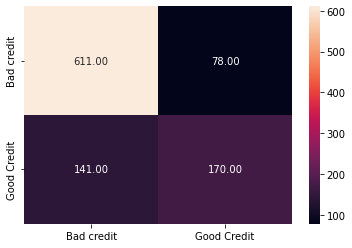

In [54]:
plt.ylabel('True label') 
plt.xlabel('Predicted label') 
draw_cm( y_pred_df.actual, y_pred_df.predicted )

*Measuring Accuracies*

In [55]:
print( metrics.classification_report( y_pred_df.actual, y_pred_df.predicted ) )

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       689
           1       0.69      0.55      0.61       311

    accuracy                           0.78      1000
   macro avg       0.75      0.72      0.73      1000
weighted avg       0.77      0.78      0.77      1000



The model is very good at identifying the good credits (Y = 0), but not very good at identifying bad 
credits. This is the result for cut-off probability of 0.5%. This can be improved by choosing the right 
cut-off probability.

We can plot the distributions of predicted probability values for good and bad credits to understand 
how well the model can distinguish bad credits from good credits.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


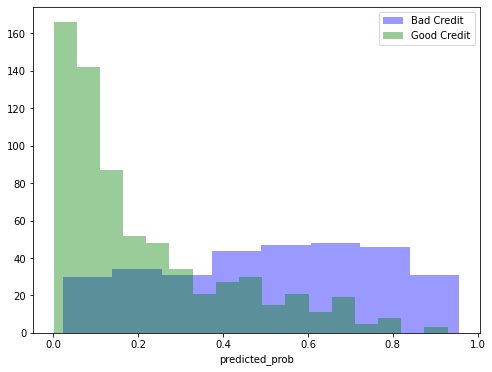

In [56]:
plt.figure( figsize = (8,6) )
# Plotting distribution of predicted probability values for bad credits
sn.distplot( y_pred_df[y_pred_df.actual == 1]['predicted_prob'], 
kde=False, color = 'b', 
label = 'Bad Credit')
# Plotting distribution of predicted probability values for good credits
sn.distplot( y_pred_df[y_pred_df.actual == 0]['predicted_prob'], 
kde=False, color = 'g', 
label = 'Good Credit') 
plt.legend()
plt.show()

We can use a chart to understand how the distributions of predicted probabilities for bad credit and 
good credit look like. Larger the overlap between predicted probabilities for different classes,
higher will be the misclassifications. 

Receiver Operating Characteristic (ROC) and Area Under the Curve (AUC)

In [57]:
def draw_roc( actual, probs ): 
# Obtain fpr, tpr, thresholds 
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False ) 
    auc_score = metrics.roc_auc_score( actual, probs ) 
    plt.figure(figsize=(8, 6))

    # Plot the fpr and tpr values for different threshold values
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score ) 

    # draw a diagonal line connecting the origin and top right most point
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
   # Setting x and y labels
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]') 
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right') 
    plt.show()

    return fpr, tpr, thresholds

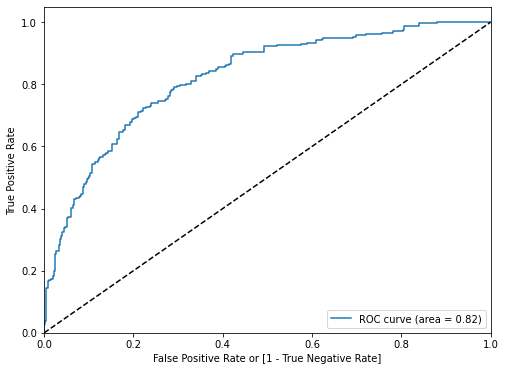

In [58]:
fpr, tpr, thresholds = draw_roc( y_pred_df.actual, 
y_pred_df.predicted_prob)

In [59]:
auc_score = metrics.roc_auc_score( y_pred_df.actual, 
y_pred_df.predicted_prob )
round( float( auc_score ), 2 )

0.82

In [60]:
tpr_fpr = pd.DataFrame( { 'tpr': tpr, 
'fpr': fpr, 
'thresholds': thresholds } )
tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr 
tpr_fpr.sort_values( 'diff', ascending = False )[0:5]

,tpr,fpr,thresholds,diff
250,0.723473,0.222061,0.339288,0.501412
239,0.710611,0.210450,0.358820,0.500161
264,0.739550,0.239478,0.313406,0.500072
248,0.720257,0.220610,0.340835,0.499648
302,0.790997,0.291727,0.264490,0.499270


In [61]:
y_pred_df['predicted_new'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.34 else 0)

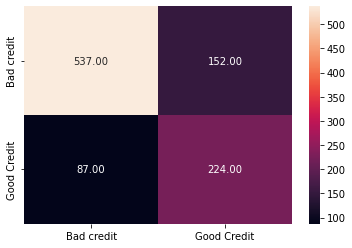

In [62]:
draw_cm( y_pred_df.actual, y_pred_df.predicted_new)

In [63]:
print(metrics.classification_report( y_pred_df.actual, 
y_pred_df.predicted_new ))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       689
           1       0.60      0.72      0.65       311

    accuracy                           0.76      1000
   macro avg       0.73      0.75      0.74      1000
weighted avg       0.78      0.76      0.77      1000

